<a href="https://colab.research.google.com/github/samirsoft-ux/TP_Complejidad_Algoritmica/blob/main/TP_Brute_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 4.57 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import json

In [ ]:
# Para leer el archivo de la BD
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [ ]:
#@title TSP PROBLEM 

#*************************************************
# Esta variable son solo los datos de las PROVINCIAS
nomprovincias = poblacionesDF['PROVINCIA'].unique()

#*************************************************
#Para saber cuantas veces se nombra esa provincia en la BD?
#Ordena la BD por provincias?
provincias = dict() #creación de un DICCIONARIO de las provincias
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  #print(nom, len(provincias[nom]))
  #print(provincias[nom])



In [ ]:
#@title Provincia 
#@markdown Ingrese la provincia

no_type_checking = ''
nom_distrito = 'PASCO' #@param {type:"string"}
#*************************************************
nomdistritos = provincias[nom_distrito]['DISTRITO'].unique()

#*************************************************
distritos = dict()


print('ESTOS SON LOS DISTRITOS QUE PERTENECEN A LA PROVINCIA', nom_distrito, 'CON SUS RESPECTIVOS NÚMERO DE CENTROS POBLADDOS ')
print('')

for nom in nomdistritos:
  distritos[nom] = provincias[nom_distrito][provincias[nom_distrito]['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))


ESTOS SON LOS DISTRITOS QUE PERTENECEN A LA PROVINCIA PASCO CON SUS RESPECTIVOS NÚMERO DE CENTROS POBLADDOS 

HUACHON 2
HUARIACA 5
NINACACA 1
PAUCARTAMBO 11
TICLACAYAN 5
YANACANCHA 9


ESTOS SON LOS CENTROS POBLADOS QUE PERTENECEN A LA PROVINCIA DE HUARIACA



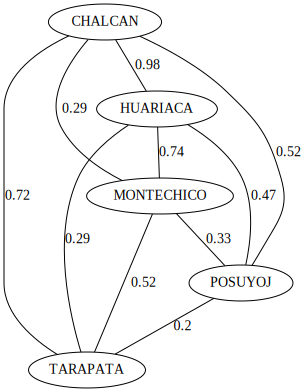

In [11]:
#@title Distrito 
#@markdown Ingrese el distrito

no_type_checking = ''
nom_distrito_distrito = 'HUARIACA' #@param {type:"string"}

#*************************************************
#Una vez hayas sacado todos los distritos de la PROVINCIA(1° interfaz)
#ahora tienes que seleccionar con que distrito vas a realizar el grafo 
#con sus centros poblados de este distrito seleccionado
distrito = distritos[nom_distrito_distrito]

#*************************************************
def dist(cp1, cp2):
  #lat1,lon1
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  #lat2,lon2
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  #*******************************************************

  y1, x1, y2, x2 = map(math.radians, [y1, x1, y2, x2])
  dlo = y2 - y1
  dla = x2 - x1
  a = math.sin(dla/2)**2 + math.cos(x1) * math.cos(x2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

  #p = math.pi/180
  #a = 0.5 - math.cos((x2 - x1) * p)/2 + math.cos(x1*p) * math.cos(x2 * p) * (1-math.cos((y2-y1)*p))/2
  #return 12742 * math.asin(math.sqrt(a)) 
  #return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

#*************************************************
G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  #print(cp1[col])
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

#*************************************************
print('ESTOS SON LOS CENTROS POBLADOS QUE PERTENECEN A LA PROVINCIA DE', nom_distrito_distrito)
print('')
gs.nx2gv(G, weighted=True, params={'size':'10'})



In [12]:
# EXTRAIGO TODA LA INFORMACIÓN DEL GRAFO PARA USARLA EN EL DICCIONARIO
grafico = dict()
#Agregarlo al diccionario
#Tengo la lista de cada nodo 
for n in list(G):
  #print('Nodo:', n)
  grafico[n] = {}
  #tengo que recorrer cada uno de sus vecinos de cada nodo para saber su tamaño
  for j in G.neighbors(n):
    #print(j,'Tamaño:', G.get_edge_data(n,j,default=0))
    result = json.dumps(G.get_edge_data(n,j,default=0))
    result = result.replace('{"weight": ', '')
    result = result.replace('}', '')
    result = float(result)
    result = result * 1000
    result = int(result)
    grafico[n][j] = result

#*************************************************    
#@title Elige Centro Poblado Inicial 
#@markdown Ingrese el centro poblado por donde va a iniciar el algoritmo

no_type_checking = ''
nom_centro_poblado_ini = 'HUARIACA' #@param {type:"string"}

#*************************************************
routes = []


def find_paths(node, cities, path, distance):
    path.append(node)

    if len(path) > 1:
        distance += cities[path[-2]][node]

    if (len(cities) == len(path)) and (path[0] in cities[path[-1]]):
        global routes
        path.append(path[0])
        distance += cities[path[-2]][path[0]]
        print (path, distance)
        routes.append([distance, path])
        return
        
    for city in cities:
        if (city not in path) and (node in cities[city]):
            find_paths(city, dict(cities), list(path), distance)


if __name__ == '__main__':
    cities = grafico.copy()

    print ("Start:")
    find_paths(nom_centro_poblado_ini, cities, [], 0)
    print ("\n")
    routes.sort()
    if len(routes) != 0:
        print ("Ruta más corta: %s" % routes[0])
    else:
        print ("FAIL!")

Start:
['HUARIACA', 'CHALCAN', 'MONTECHICO', 'POSUYOJ', 'TARAPATA', 'HUARIACA'] 2090
['HUARIACA', 'CHALCAN', 'MONTECHICO', 'TARAPATA', 'POSUYOJ', 'HUARIACA'] 2460
['HUARIACA', 'CHALCAN', 'POSUYOJ', 'MONTECHICO', 'TARAPATA', 'HUARIACA'] 2640
['HUARIACA', 'CHALCAN', 'POSUYOJ', 'TARAPATA', 'MONTECHICO', 'HUARIACA'] 2960
['HUARIACA', 'CHALCAN', 'TARAPATA', 'MONTECHICO', 'POSUYOJ', 'HUARIACA'] 3020
['HUARIACA', 'CHALCAN', 'TARAPATA', 'POSUYOJ', 'MONTECHICO', 'HUARIACA'] 2970
['HUARIACA', 'MONTECHICO', 'CHALCAN', 'POSUYOJ', 'TARAPATA', 'HUARIACA'] 2040
['HUARIACA', 'MONTECHICO', 'CHALCAN', 'TARAPATA', 'POSUYOJ', 'HUARIACA'] 2420
['HUARIACA', 'MONTECHICO', 'POSUYOJ', 'CHALCAN', 'TARAPATA', 'HUARIACA'] 2600
['HUARIACA', 'MONTECHICO', 'POSUYOJ', 'TARAPATA', 'CHALCAN', 'HUARIACA'] 2970
['HUARIACA', 'MONTECHICO', 'TARAPATA', 'CHALCAN', 'POSUYOJ', 'HUARIACA'] 2970
['HUARIACA', 'MONTECHICO', 'TARAPATA', 'POSUYOJ', 'CHALCAN', 'HUARIACA'] 2960
['HUARIACA', 'POSUYOJ', 'CHALCAN', 'MONTECHICO', 'TARAPAT